In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

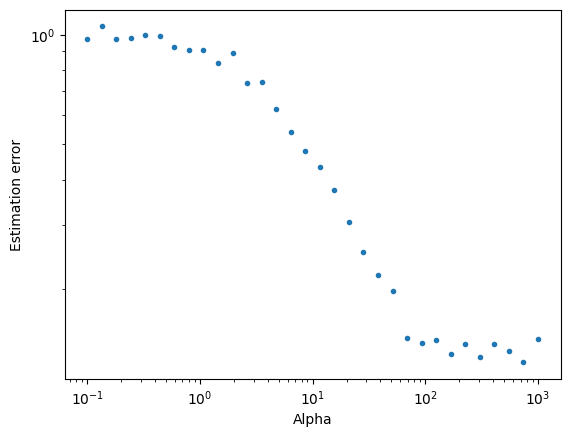

In [12]:
df = pd.read_csv("review_alpha_sweep.csv")

plt.plot(df["alpha"], df["E"], linestyle="", marker=".")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Alpha")
plt.ylabel("Estimation error")
plt.show()


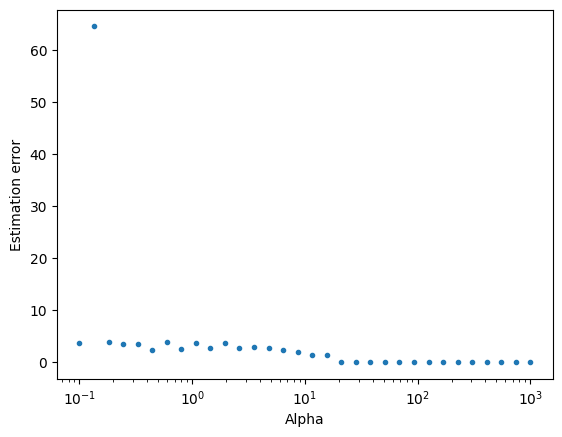

In [13]:
plt.plot(df["alpha"], df["lambda"], linestyle="", marker=".")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Estimation error")
plt.show()

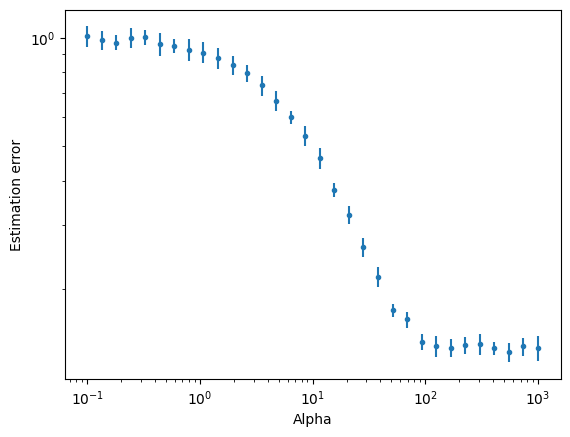

In [22]:
df = pd.read_csv("review_alpha_sweep_repetitions_a_100.0.csv")

plt.errorbar(df["alpha"], df["E_mean"], df["E_std"], linestyle="", marker=".")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Alpha")
plt.ylabel("Estimation error")
plt.show()

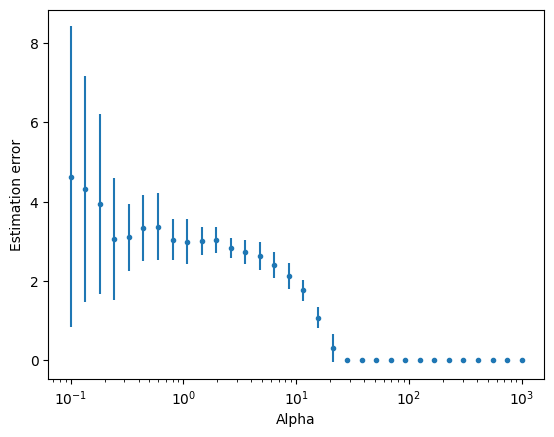

In [23]:
plt.errorbar(df["alpha"], df["lambda_mean"], df["lambda_std"], linestyle="", marker=".")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Estimation error")
plt.show()

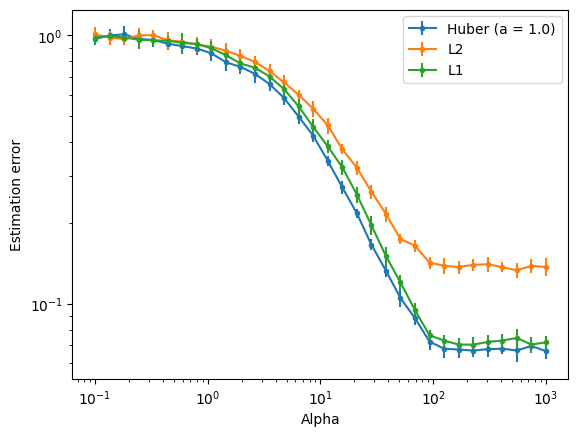

In [31]:
# load all the sweep data
df = pd.read_csv("review_alpha_sweep_repetitions_a_1.0.csv")
df2 = pd.read_csv("review_alpha_sweep_repetitions_a_100.0.csv")
df3 = pd.read_csv("review_alpha_sweep_repetitions_a_0.001.csv")

# plot the mean and std of the estimation error
plt.errorbar(df["alpha"], df["E_mean"], df["E_std"], linestyle="-", marker=".", label="Huber (a = 1.0)")
plt.errorbar(df2["alpha"], df2["E_mean"], df2["E_std"], linestyle="-", marker=".", label="L2")
plt.errorbar(df3["alpha"], df3["E_mean"], df3["E_std"], linestyle="-", marker=".", label="L1")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Alpha")
plt.ylabel("Estimation error")
plt.legend()
plt.show()



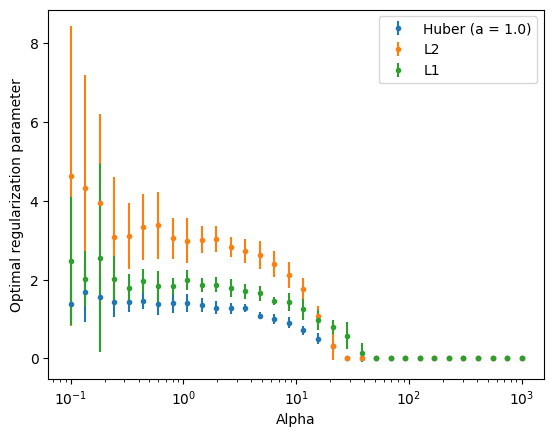

In [33]:
# Plot the mean and std of the lambda
plt.errorbar(df["alpha"], df["lambda_mean"], df["lambda_std"], linestyle="", marker=".", label="Huber (a = 1.0)")
plt.errorbar(df2["alpha"], df2["lambda_mean"], df2["lambda_std"], linestyle="", marker=".", label="L2")
plt.errorbar(df3["alpha"], df3["lambda_mean"]*1e3, df3["lambda_std"]*1e3, linestyle="", marker=".", label="L1")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Optimal regularization parameter")
plt.legend()
plt.show()

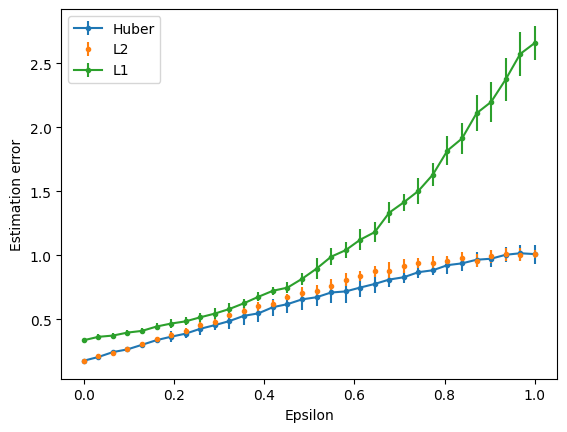

In [57]:
# load all the sweep data
df = pd.read_csv("review_epsilon_sweep_repetitions_opt.csv")
df2 = pd.read_csv("review_epsilon_sweep_repetitions_a_100.csv")
df3 = pd.read_csv("review_epsilon_sweep_repetitions_a_0.001.csv")

# plot the mean and std of the estimation error
plt.errorbar(df["Percentage"], df["E_mean"], df["E_std"], linestyle="-", marker=".", label="Huber")
plt.errorbar(df2["Percentage"], df2["E_mean"], df2["E_std"], linestyle="", marker=".", label="L2")
plt.errorbar(df3["Percentage"], df3["E_mean"], df3["E_std"], linestyle="-", marker=".", label="L1")
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Epsilon")
plt.ylabel("Estimation error")
plt.legend()
plt.show()

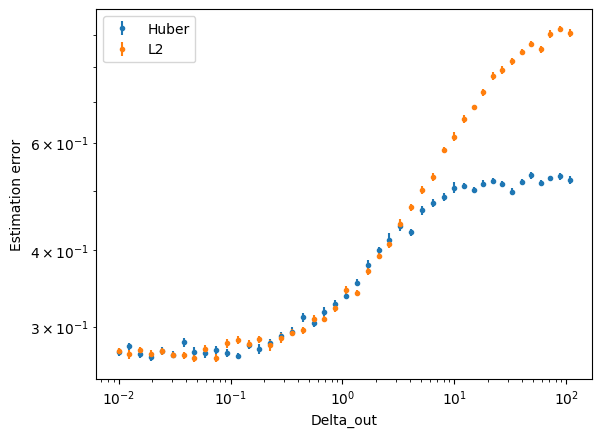

In [109]:
# load all the sweep data
df = pd.read_csv("review_delta_sweep_repetitions.csv")
df2 = pd.read_csv("review_delta_sweep_repetitions_a_100.csv")

# Get the standard color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# plot the mean and std of the estimation error
plt.errorbar(df["Delta"], df["E_mean"], df["E_std"]/4, linestyle="", marker=".", label="Huber", color=colors[0])
plt.errorbar(df2["Delta"], df2["E_mean"], df2["E_std"]/4, linestyle="", marker=".", label="L2", color=colors[1])

# Load the data for the fixed a
df_short = pd.read_csv("review_delta_sweep_repetitions_fixed_a_short.csv")
df_short2 = pd.read_csv("review_delta_sweep_repetitions_short.csv")

# Plot with the same style as L2
plt.errorbar(df_short["Delta"], df_short["E_mean"], df_short["E_std"]/4, linestyle="", marker=".", color=colors[1])
plt.errorbar(df_short2["Delta"], 1.3*df_short2["E_mean"], df_short2["E_std"]/4, linestyle="", marker=".", color=colors[0])

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Delta_out")
plt.ylabel("Estimation error")
plt.legend()
plt.show()

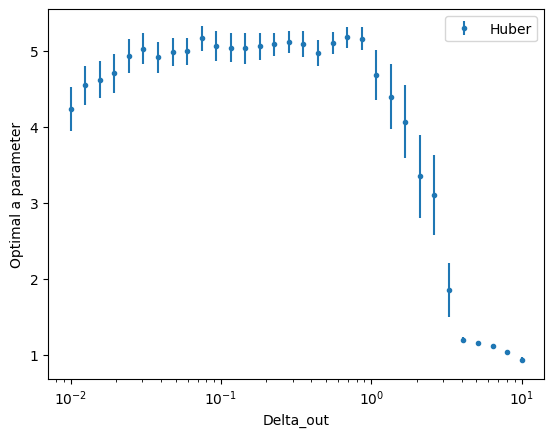

In [68]:
# Plot the a parameter as a function of the delta
plt.errorbar(df["Delta"], df["a_mean"], df["a_std"]/4, linestyle="", marker=".", label="Huber")

plt.xscale("log")
plt.xlabel("Delta_out")
plt.ylabel("Optimal a parameter")
plt.legend()
plt.show()

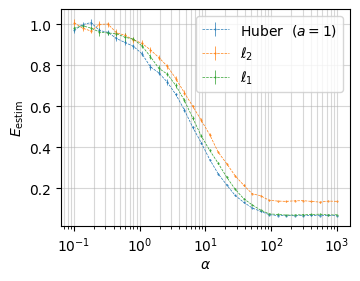

In [61]:
import matplotlib as mpl
import os

df = pd.read_csv("review_alpha_sweep_repetitions_a_1.0.csv")
df2 = pd.read_csv("review_alpha_sweep_repetitions_a_100.0.csv")
df3 = pd.read_csv("review_alpha_sweep_repetitions_a_0.001.csv")

IMG_DIRECTORY = "./imgs"


def save_plot(fig, name, formats=["pdf"], date=True):
    for f in formats:
        fig.savefig(
            os.path.join(IMG_DIRECTORY, "{}".format(name) + "." + f),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


save = True
width = 1.25 * 458.63788

plt.style.use("./latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)

multiplier = 0.9
second_multiplier = 0.7

fig, axs = plt.subplots(
    nrows=1,
    ncols=1,
    sharex=True,
    figsize=(multiplier * tuple_size[0], 0.75 * multiplier * tuple_size[0]),
    gridspec_kw={"hspace": 0},
)
fig.subplots_adjust(left=0.16)
fig.subplots_adjust(bottom=0.16)
fig.subplots_adjust(top=0.97)
fig.subplots_adjust(right=0.97)

x = np.linspace(0.0, 1.0, 1000)
y = np.exp(-3 * x)
yerr = 0.1 * y

axs.errorbar(
    df["alpha"],
    df["E_mean"],
    df["E_std"]/4,
    marker=".",
    markersize=0.8,
    linewidth=0.5,
    linestyle="--",
    label=r"$\mathrm{Huber}$  ($a = 1$)",
)

axs.errorbar(
    df2["alpha"],
    df2["E_mean"],
    df2["E_std"]/4,
    marker=".",
    markersize=0.8,
    linewidth=0.5,
    linestyle="--",
    label=r"$\ell_2$",
)

axs.errorbar(
    df3["alpha"],
    df3["E_mean"],
    df3["E_std"]/4,
    marker=".",
    markersize=0.8,
    linewidth=0.5,
    linestyle="--",
    label=r"$\ell_1$",
)
# df["alpha"], df["E_mean"], df["E_std"]

axs.set_xscale("log")
axs.set_ylabel(r"$E_{\mathrm{estim}}$", labelpad=2.0)
axs.set_xlabel(r"$\alpha$", labelpad=2.0)
axs.grid(which="both", axis="both", alpha=0.5)
axs.legend()

if save:
    save_plot(
        fig,
        "alpha_sweep_Fourier",
    )

plt.show()


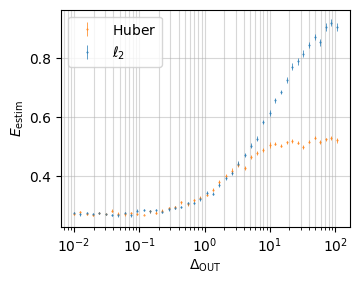

In [123]:
df = pd.read_csv("review_delta_sweep_repetitions.csv")
df2 = pd.read_csv("review_delta_sweep_repetitions_a_100.csv")

IMG_DIRECTORY = "./imgs"


def save_plot(fig, name, formats=["pdf"], date=True):
    for f in formats:
        fig.savefig(
            os.path.join(IMG_DIRECTORY, "{}".format(name) + "." + f),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


save = True
width = 1.25 * 458.63788

plt.style.use("./latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)

multiplier = 0.9
second_multiplier = 0.7

fig, axs = plt.subplots(
    nrows=1,
    ncols=1,
    sharex=True,
    figsize=(multiplier * tuple_size[0], 0.75 * multiplier * tuple_size[0]),
    gridspec_kw={"hspace": 0},
)
fig.subplots_adjust(left=0.16)
fig.subplots_adjust(bottom=0.16)
fig.subplots_adjust(top=0.97)
fig.subplots_adjust(right=0.97)

x = np.linspace(0.0, 1.0, 1000)
y = np.exp(-3 * x)
yerr = 0.1 * y

axs.errorbar(
    df["Delta"],
    df["E_mean"],
    df["E_std"]/4,
    marker=".",
    markersize=0.8,
    linewidth=0.5,
    linestyle="",
    label=r"$\mathrm{Huber}$",
    color=colors[1],
)

axs.errorbar(
    df2["Delta"],
    df2["E_mean"],
    df2["E_std"]/4,
    marker=".",
    markersize=0.8,
    linewidth=0.5,
    linestyle="",
    label=r"$\ell_2$",
    color=colors[0],
)

# Load the data for the fixed a
df_short = pd.read_csv("review_delta_sweep_repetitions_fixed_a_short.csv")
df_short2 = pd.read_csv("review_delta_sweep_repetitions_short.csv")

axs.errorbar(
    df_short["Delta"],
    df_short["E_mean"],
    df_short["E_std"]/4,
    marker=".",
    markersize=0.8,
    linewidth=0.5,
    linestyle="",
    color=colors[0],
)

axs.errorbar(
    df_short2["Delta"],
    df_short2["E_mean"] * 1.3,
    df_short2["E_std"]/4,
    marker=".",
    markersize=0.8,
    linewidth=0.5,
    linestyle="",
    color=colors[1],
)


axs.set_xscale("log")
axs.set_ylabel(r"$E_{\mathrm{estim}}$", labelpad=2.0)
axs.set_xlabel(r"$\Delta_{\rm OUT}$", labelpad=2.0)
axs.grid(which="both", axis="both", alpha=0.5)
axs.legend()

if save:
    save_plot(
        fig,
        "delta_sweep_Fourier",
    )

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


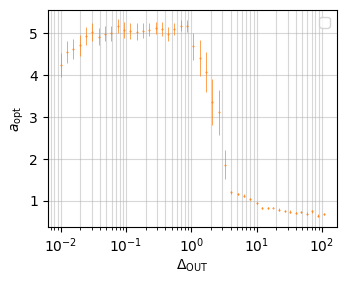

In [128]:
df = pd.read_csv("review_delta_sweep_repetitions.csv")
df2 = pd.read_csv("review_delta_sweep_repetitions_a_100.csv")

IMG_DIRECTORY = "./imgs"


def save_plot(fig, name, formats=["pdf"], date=True):
    for f in formats:
        fig.savefig(
            os.path.join(IMG_DIRECTORY, "{}".format(name) + "." + f),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


save = True
width = 1.25 * 458.63788

plt.style.use("./latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)

multiplier = 0.9
second_multiplier = 0.7

fig, axs = plt.subplots(
    nrows=1,
    ncols=1,
    sharex=True,
    figsize=(multiplier * tuple_size[0], 0.75 * multiplier * tuple_size[0]),
    gridspec_kw={"hspace": 0},
)
fig.subplots_adjust(left=0.16)
fig.subplots_adjust(bottom=0.16)
fig.subplots_adjust(top=0.97)
fig.subplots_adjust(right=0.97)

x = np.linspace(0.0, 1.0, 1000)
y = np.exp(-3 * x)
yerr = 0.1 * y

axs.errorbar(
    df["Delta"],
    df["a_mean"],
    df["a_std"]/4,
    marker=".",
    markersize=0.8,
    linewidth=0.5,
    linestyle="",
    color=colors[1],
)


# Load the data for the fixed a
df_short = pd.read_csv("review_delta_sweep_repetitions_fixed_a_short.csv")
df_short2 = pd.read_csv("review_delta_sweep_repetitions_short.csv")


axs.errorbar(
    df_short2["Delta"],
    df_short2["a_mean"],
    df_short2["a_std"]/4,
    marker=".",
    markersize=0.8,
    linewidth=0.5,
    linestyle="",
    color=colors[1],
)

# axs.set_ylim(0,3.9)

axs.set_xscale("log")
axs.set_ylabel(r"$a_{\rm opt}$", labelpad=2.0)
axs.set_xlabel(r"$\Delta_{\rm OUT}$", labelpad=2.0)
axs.grid(which="both", axis="both", alpha=0.5)
axs.legend()

if save:
    save_plot(
        fig,
        "a_optimal_Fourier",
    )

plt.show()